In [ ]:
from log_helper.log_helper import LogHelper
from datetime import datetime
from pytz import timezone

import os
import pathlib
import logging

In [ ]:
##################################################################################################
# Setup logger and output dir                                                                    #
##################################################################################################
output_dir = 'log/test-{}'.format(datetime.now(timezone('Asia/Seoul')).strftime('%Y-%m-%d_%H-%M-%S-%f')[:-3])
if not os.path.exists(output_dir):
    pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)

# Setup logger
LogHelper.setup(log_path='{}/test.log'.format(output_dir), log_level=logging.INFO)
_logger = logging.getLogger(__name__)

In [1]:
from autocluster import AutoCluster
from algorithms import algorithms
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
def visualize_data(data):
    points = data
    plt.scatter(points[:, 0], points[:, 1])
    plt.show()

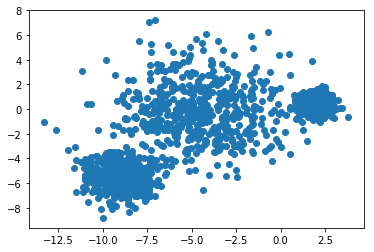

In [3]:
X = varied[0]
visualize_data(X)

In [4]:
autocluster = AutoCluster()

In [5]:
smac_obj, opt_result = autocluster.fit(X, n_evaluations=20)

In [6]:
autocluster.predict(X)

array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

In [7]:
opt_result

Configuration:
  algorithm_choice, Value: 'KMeans'
  n_clusters, Value: 3

In [ ]:
smac_obj.get_trajectory()

In [ ]:
from build_config_space import Mapper